# Wine Quality

In this project I analyze a data set on wine quality taken from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). The data consists of a chemical analysis of many types of wine and each is given a quality score. You can read more about the data [here](http://archive.ics.uci.edu/ml/index.html).

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np

import pandas as pd

## Load the data

The following Pandas command will load the data into a structure called a dataframe. This is like an Excel spreadsheet table and the data can be manipulated in similar ways to data in Excel. I will focus on the red wines for this study.

In [8]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')

Let's take a look at the data. A good way to do this is using the **`info()`**, **`head()`**, and **`describe()`** functions in Pandas.

In [9]:
red_wine.head(n=20)  # This command displays the column headings and first five rows of data.

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5  
15      9.2        5  
16     10.5        7  
17      9.3        5  
18      9.0        4  
19      9.2        6

In [10]:
red_wine.loc[red_wine.loc[:,'alcohol'] > 13, :]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
45              4.6             0.520         0.15             2.1      0.054   
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
378            11.4             0.625         0.66             6.2      0.088   
455            11.3             0.620         0.67             5.2      0.086   
467             8.8             0.460         0.45             2.6      0.065   
484            10.6             0.440         0.68             4.1      0.114   
491             9.2             0.410         0.50             2.5      0.055   
492             8.9             0.400         0.51             2.6      0.052   
588             5.0             0.420         0.24             2.0      0.060   
652            15.9             0.360         0.65             7.5      0.096   
821             4.9             0.420         0.00             2.1      0.048   
910             9.3             0.380         0.48             3.8      0.132   
1114            5.0             0.400         0.50             4.3      0.046   
1118            7.1             0.390         0.12             2.1      0.065   
1120            7.9             0.540         0.34             2.5      0.076   
1126            5.8             0.290         0.26             1.7      0.063   
1132            7.4             0.360         0.34             1.8      0.075   
1228            5.1             0.420         0.00             1.8      0.044   
1269            5.5             0.490         0.03             1.8      0.044   
1270            5.0             0.380         0.01             1.6      0.048   
1475            5.3             0.470         0.11             2.2      0.048   
1477            5.3             0.470         0.11             2.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
45                    8.0                  65.0  0.99340  3.90       0.56   
142                  27.0                  63.0  0.99160  3.68       0.79   
144                  27.0                  63.0  0.99160  3.68       0.79   
378                   6.0                  24.0  0.99880  3.11       0.99   
455                   6.0                  19.0  0.99880  3.22       0.69   
467                   7.0                  18.0  0.99470  3.32       0.79   
484                   6.0                  24.0  0.99700  3.06       0.66   
491                  12.0                  25.0  0.99520  3.34       0.79   
492                  13.0                  27.0  0.99500  3.32       0.90   
588                  19.0                  50.0  0.99170  3.72       0.74   
652                  22.0                  71.0  0.99760  2.98       0.84   
821                  16.0                  42.0  0.99154  3.71       0.74   
910                   3.0                  11.0  0.99577  3.23       0.57   
1114                 29.0                  80.0  0.99020  3.49       0.66   
1118                 14.0                  24.0  0.99252  3.30       0.53   
1120                  8.0                  17.0  0.99235  3.20       0.72   
1126                  3.0                  11.0  0.99150  3.39       0.54   
1132                 18.0                  38.0  0.99330  3.38       0.88   
1228                 18.0                  88.0  0.99157  3.68       0.73   
1269                 28.0                  87.0  0.99080  3.50       0.82   
1270                 26.0                  60.0  0.99084  3.70       0.75   
1475                 16.0                  89.0  0.99182  3.54       0.88   
1477                 16.0                  89.0  0.99182  3.54       0.88   

        alcohol  quality  
45    13.100000        4  
142   14.000000        6  
144   14.000000        6  
378   13.300000        6  
455   13.400000        8  
467   14.000000        6  
484   13.400000        

In [11]:
red_wine.describe().T  # This command displays statistics about each column with numerical data.

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [12]:
red_wine.info()  # This command displays the column types, the number of values in the column and the size of the 
                 # dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Scatter plot matrix
To better understand the data, I will use a scatter plot matrix. This is a plot comparing all values in the data set by plotting one value versus the other. All features are labeled both on the x-axis and the y-axis. If, for example, you want to compare **`citric acid`** and **`sulphates`** you would read off **`citric acid`** from the x-axis and then go up to **`sulphates`** on the y-axis to find the plot that compares these two features. If you compare the same feature with itself you will see a histogram showing it's distribution. It provides a good way to see how the different features are related to eachother. 

I use the Python visualization library Seaborn to make these plots. [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) is a great tool for high level statistical graphics.

In [13]:
import seaborn as sb
sb.set_context("notebook", font_scale=2.5)

from matplotlib import pyplot as plt

%matplotlib inline

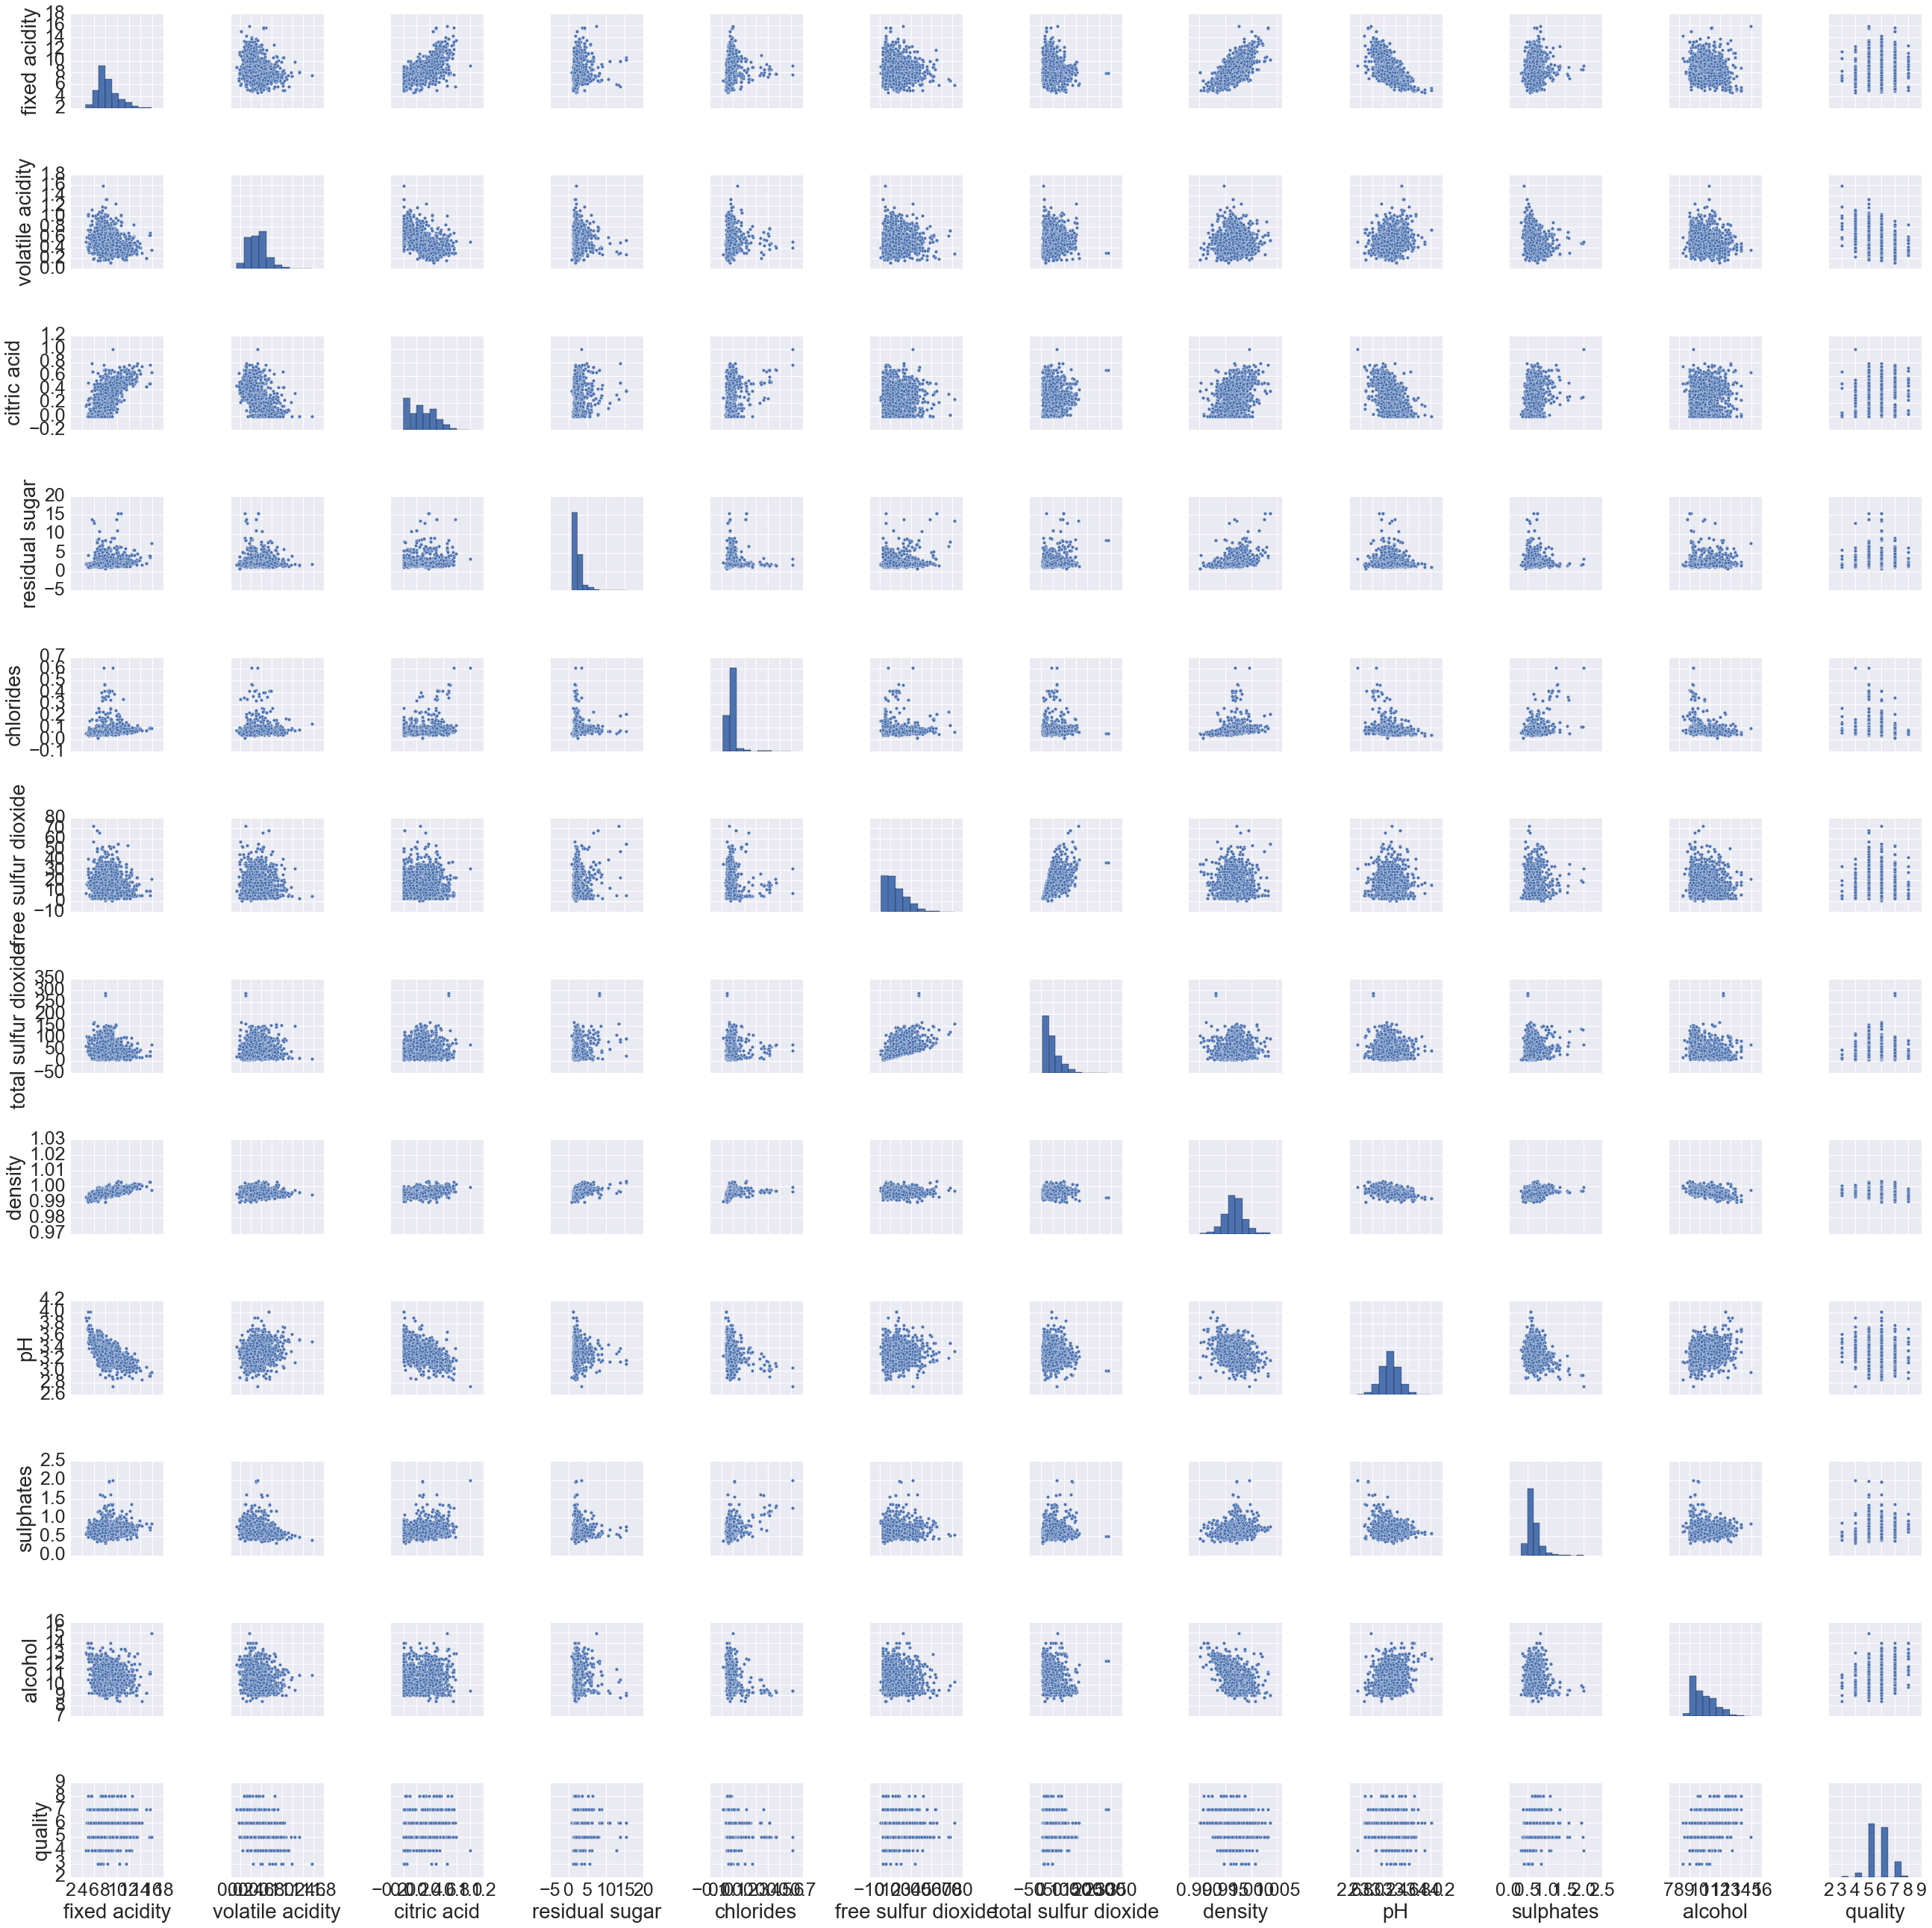

In [14]:
sb.pairplot(red_wine, size=3)

## Outliers
If you look at the plots you will notice some of the features show outliers. For example, let's look at the plots comparing **`sulphates`** and **`total sulfar dioxide`**. I circle in red points that look like they clearly deviate from the mean.

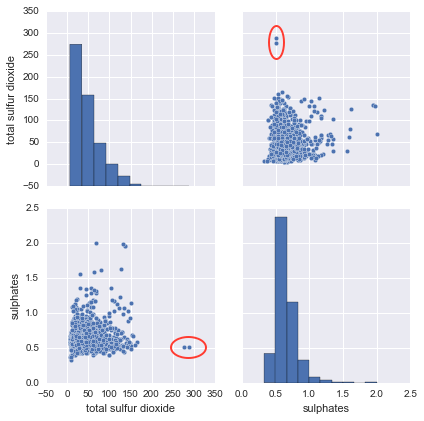

In [15]:
from IPython.display import Image
Image(filename='images/fig1.png')

In [16]:
red_wine[['total sulfur dioxide', 'sulphates']].describe().T

count       mean        std   min    25%    50%    75%  \
total sulfur dioxide  1599.0  46.467792  32.895324  6.00  22.00  38.00  62.00   
sulphates             1599.0   0.658149   0.169507  0.33   0.55   0.62   0.73   

                        max  
total sulfur dioxide  289.0  
sulphates               2.0

To exclude the outliers I defined the function below. It takes as input a dataframe, a threshold defined as number of standard deviations from the mean, and which columns you want to 'clean'. It then sets any value that is above the threshold to the mean of that column.

In [17]:
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        df.loc[mask == True,col] = np.nan
        mean_property = df.loc[:,col].mean()
        df.loc[mask == True,col] = mean_property
    return df

In [18]:
column_list = red_wine.columns.tolist()  # Save the column names for the wine dataframe to a list.

Below, I set the threshold to five. Any value more than five standard deviations from the mean will be labeled as an outlier.

In [19]:
threshold = 5

In [20]:
red_wine_cleaned = red_wine.copy()
red_wine_cleaned = outliers(red_wine_cleaned, threshold, column_list[0:-1])
red_wine_cleaned.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527162   0.177113  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.463948   1.076293  0.90000   1.9000   
chlorides             1599.0   0.082942   0.025960  0.01200   0.0700   
free sulfur dioxide   1599.0  15.839800  10.365444  1.00000   7.0000   
total sulfur dioxide  1599.0  46.170946  31.806575  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.652495   0.148975  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.33000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000    9.00000  
chlorides              0.07900   0.089000    0.27000  
free sulfur dioxide   14.00000  21.000000   68.00000  
total sulfur dioxide  38.00000  62.000000  165.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    1.36000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

Now let's examine the data again with the outliers removed.

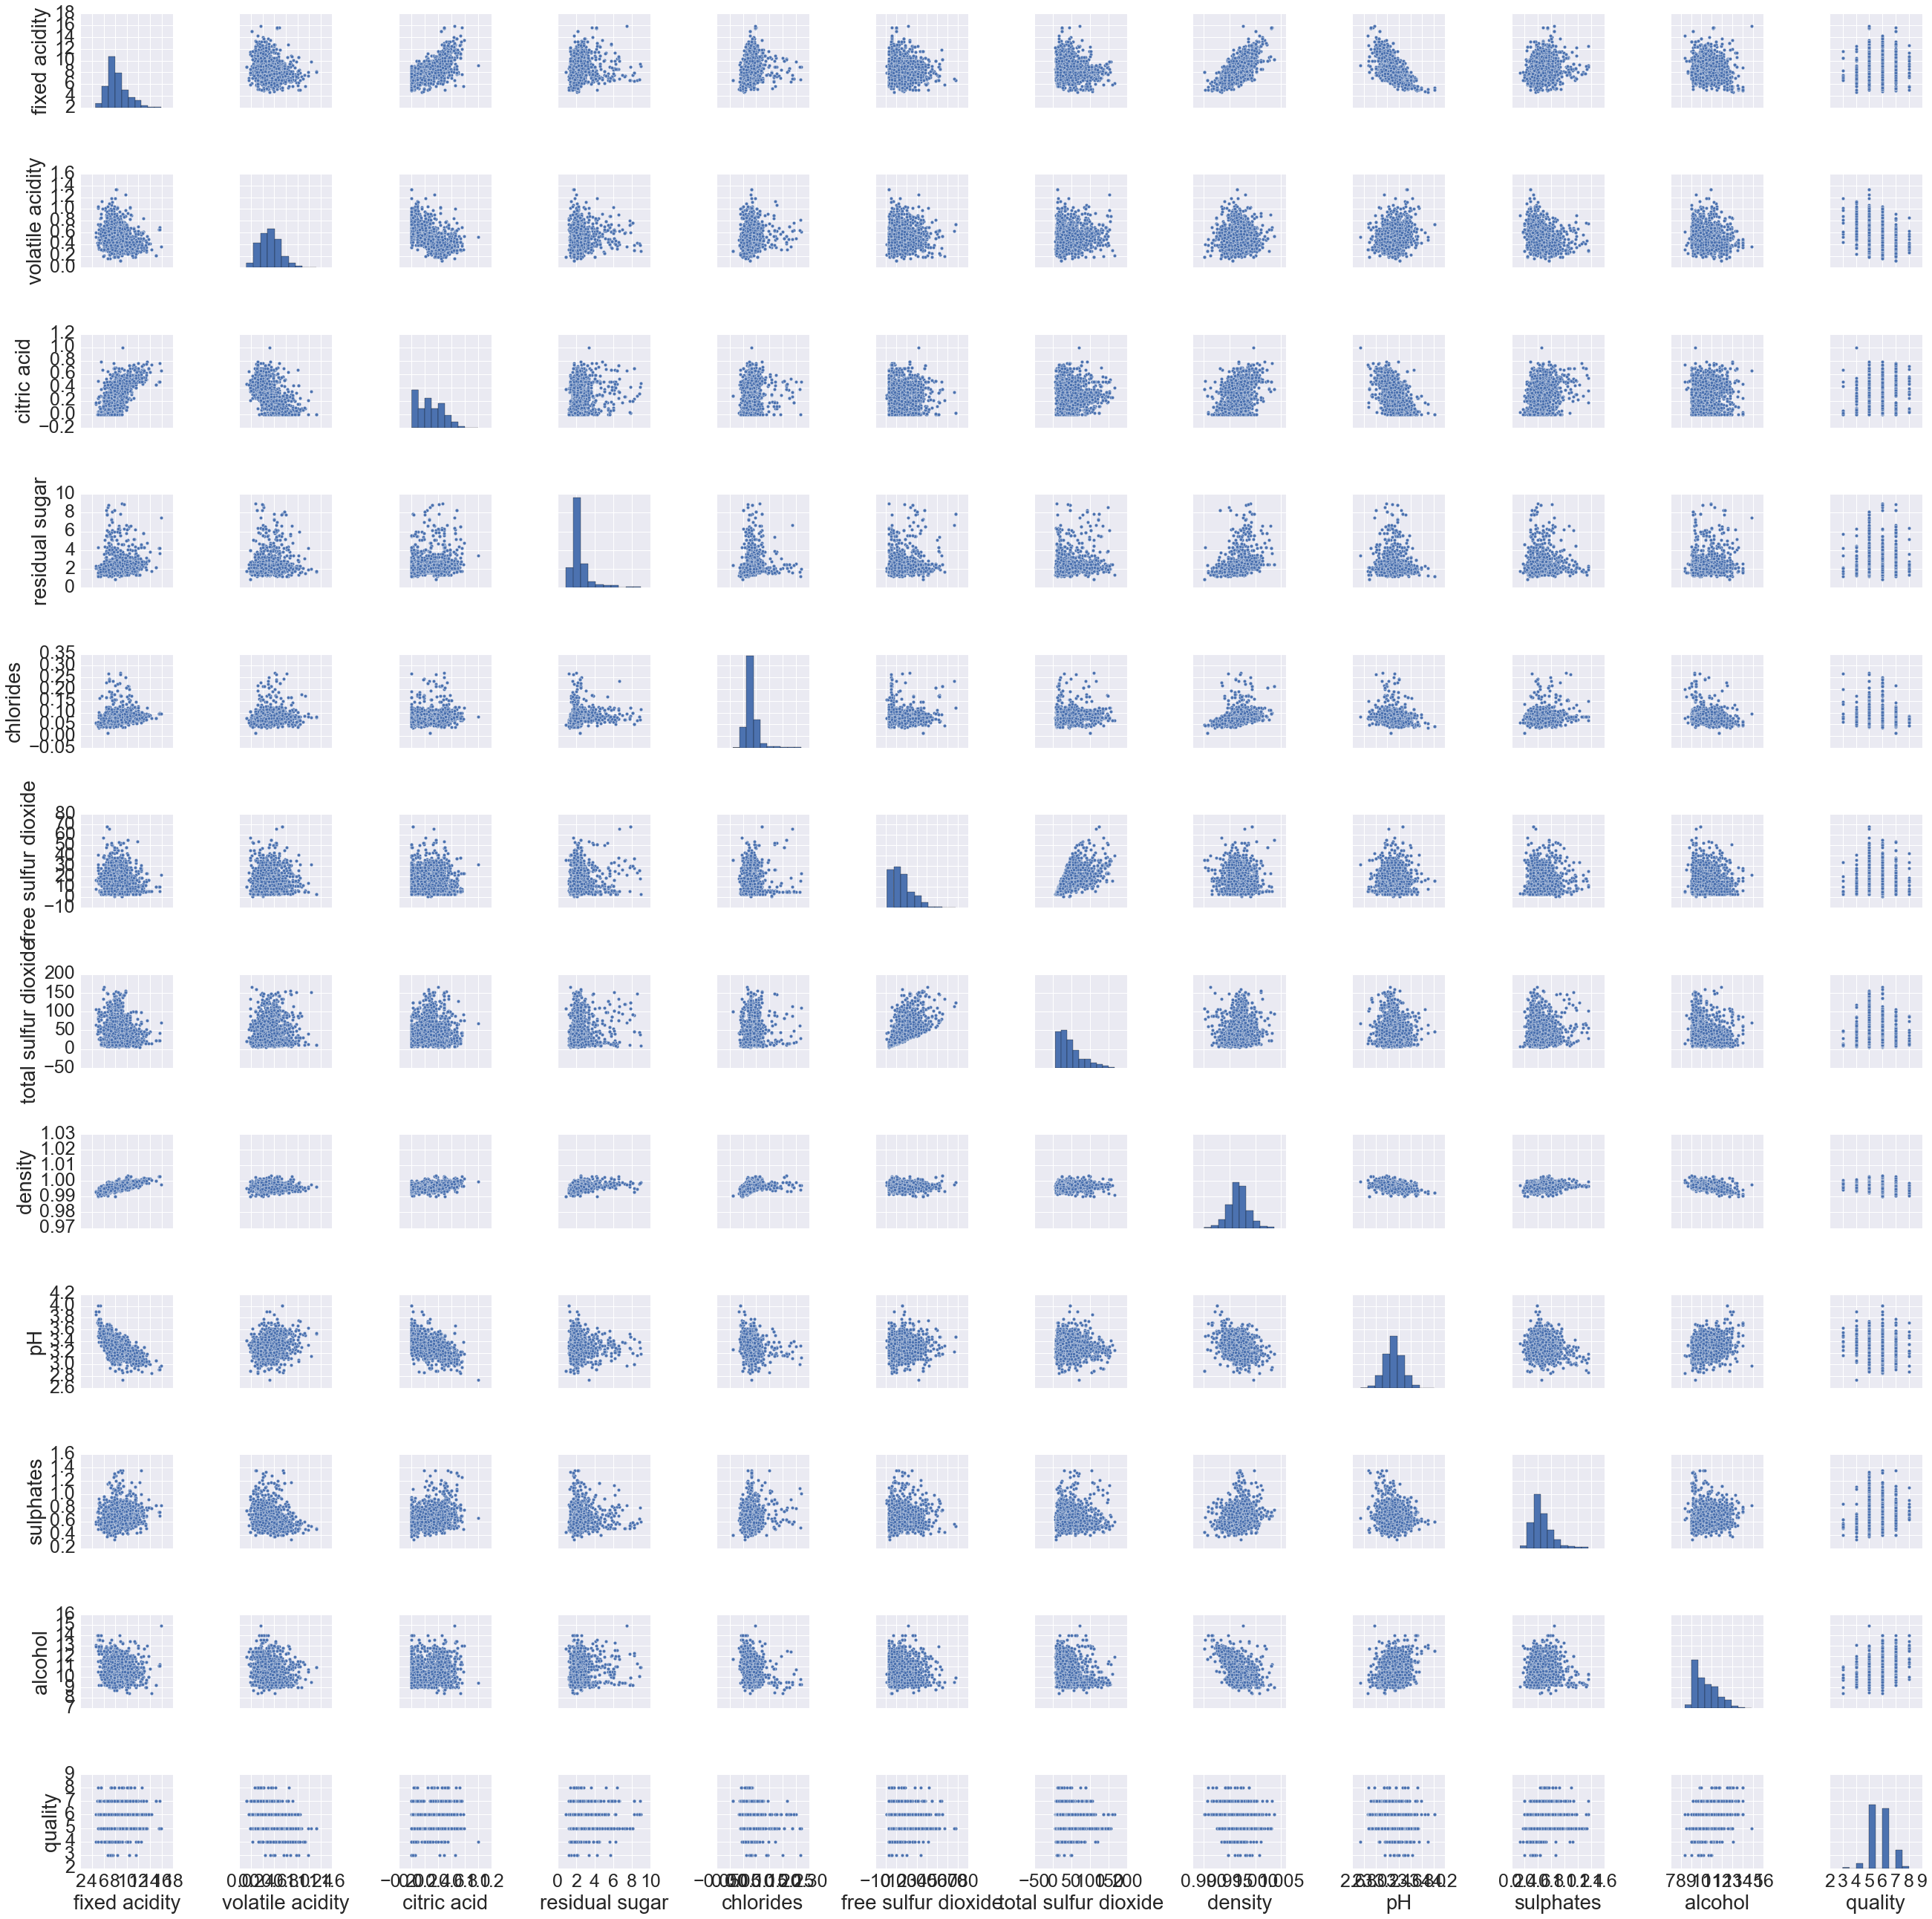

In [21]:
sb.pairplot(red_wine_cleaned, size=3)

Let's compare the two features **`total sulfur dioxide`** and **`sulphates`** again, with and with out outliers, to see the difference.

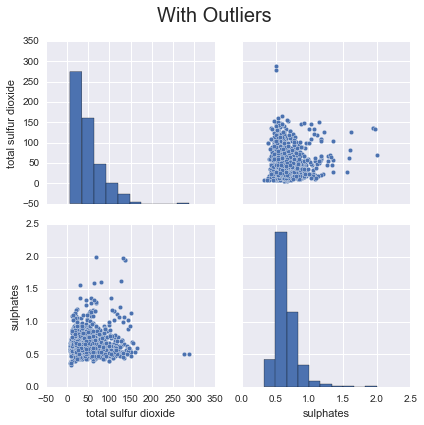

In [22]:
sb.set_context("notebook", font_scale=1)
pp = sb.pairplot(red_wine[['total sulfur dioxide', 'sulphates']], size=3)
plt.subplots_adjust(top=0.9)
pp.fig.suptitle('With Outliers', fontsize=20, verticalalignment='top')

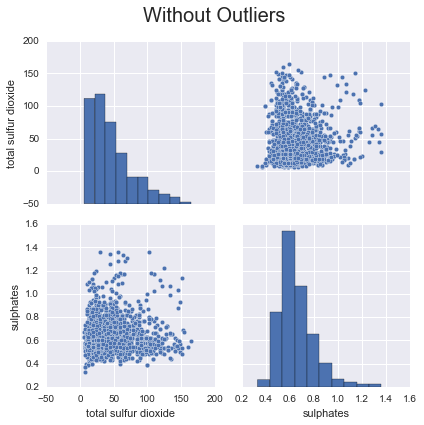

In [23]:
sb.set_context("notebook", font_scale=1)
pp = sb.pairplot(red_wine_cleaned[['total sulfur dioxide', 'sulphates']], size=3)
plt.subplots_adjust(top=0.9)
pp.fig.suptitle('Without Outliers', fontsize=20, verticalalignment='top')

## Binning the data by category

Now I bin the data to define categories. Our model will try to infer the category given the various chemical properties meassured for the wine dataset.

In [24]:
print("The range is wine quality is {0}".format(np.sort(red_wine_cleaned['quality'].unique())))

The range is wine quality is [3 4 5 6 7 8]


First, I bin the data into three bins based on their quality, 'Bad', 'Average', and 'Good'.

In [25]:
bins = [3, 5, 6, 8]
red_wine_cleaned['category'] = pd.cut(red_wine_cleaned.quality, bins, labels=['Bad', 'Average', 'Good'])

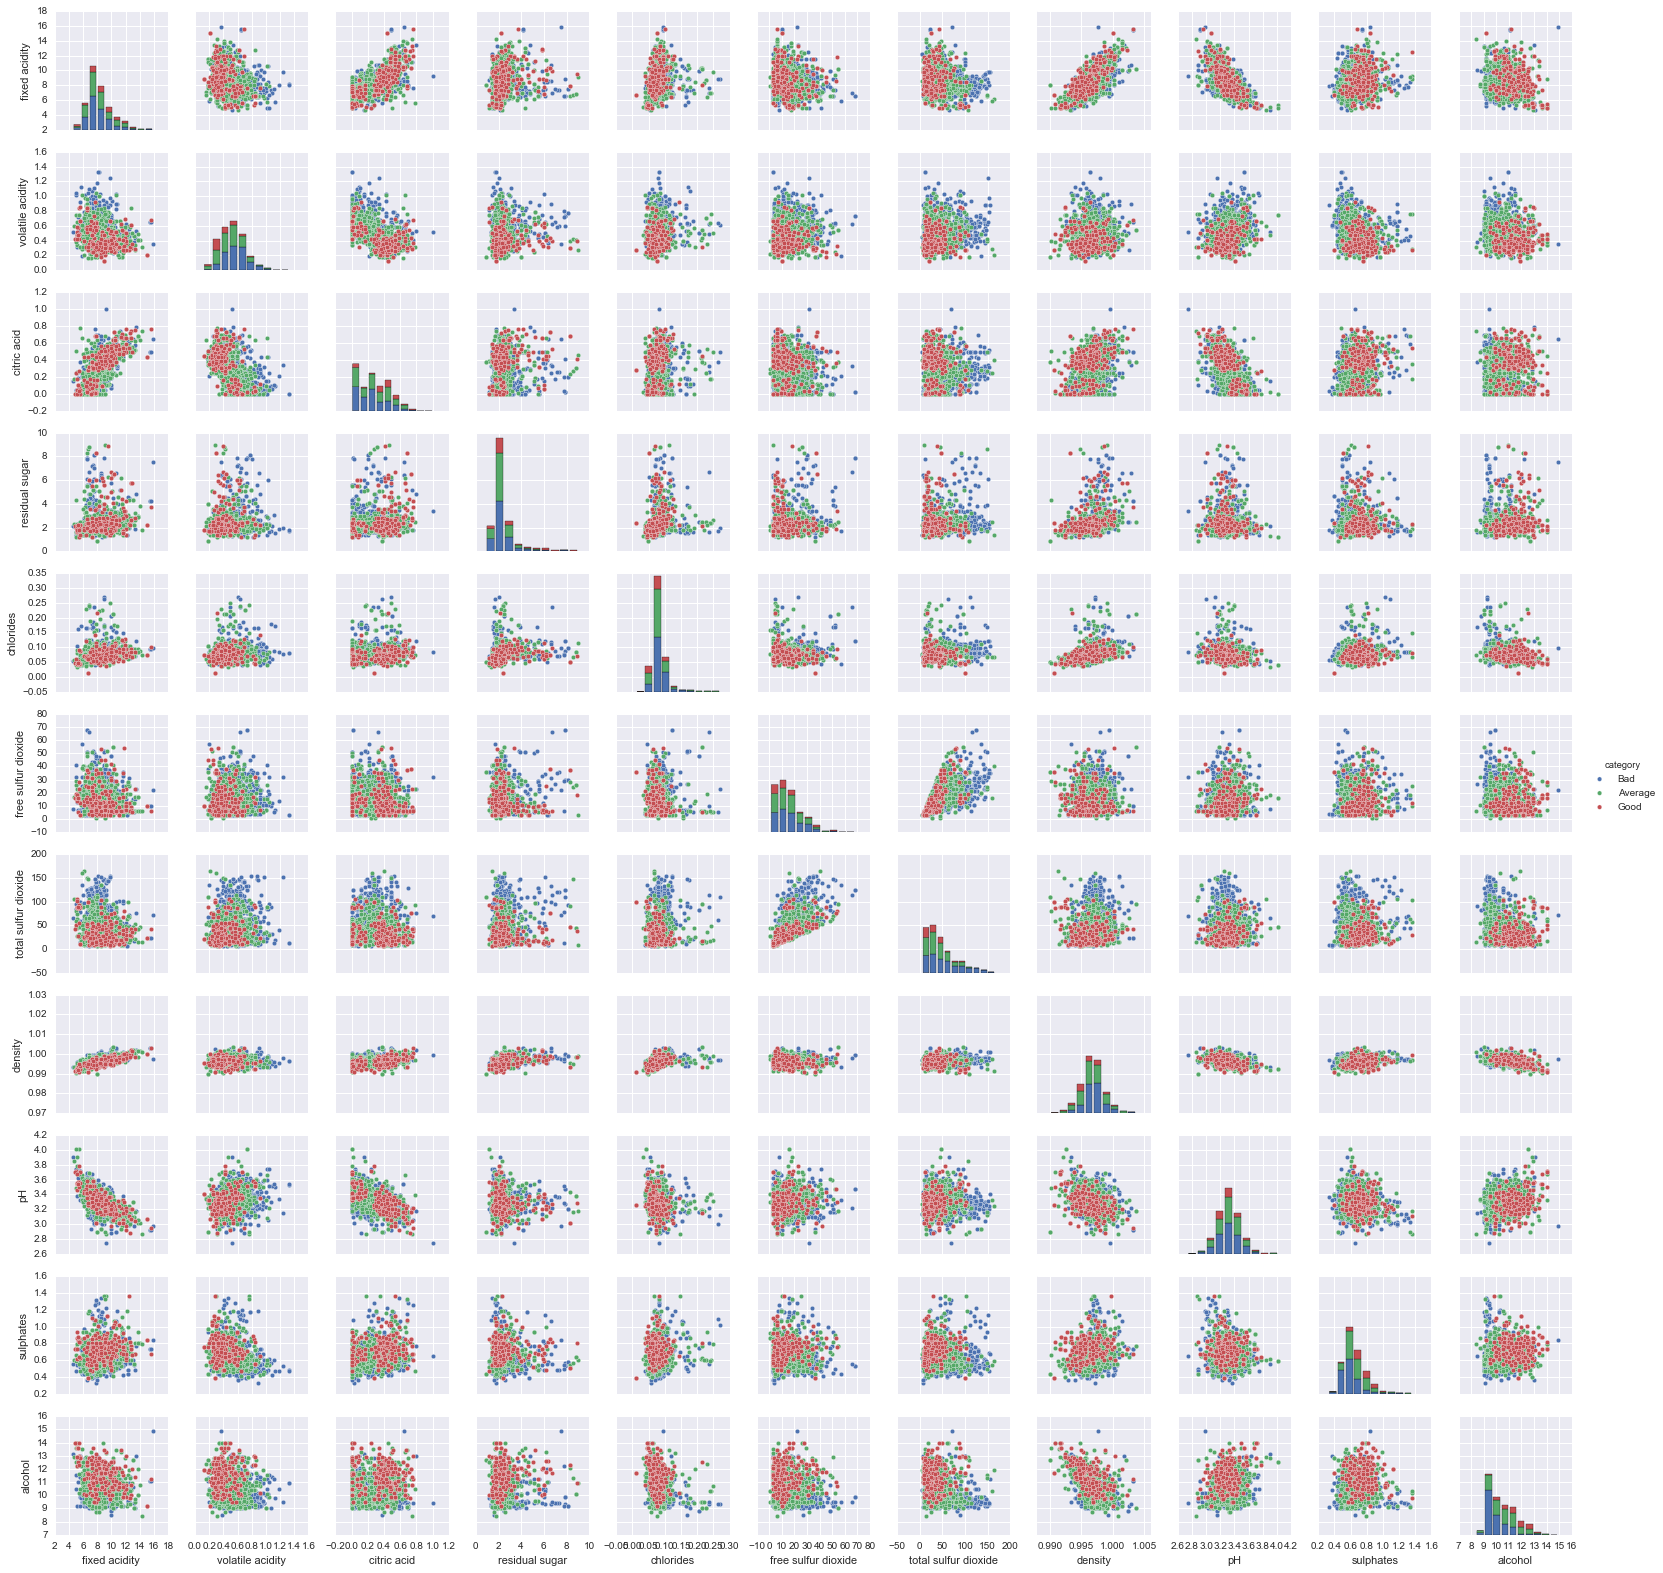

In [26]:
sb.pairplot(red_wine_cleaned.drop(['quality'],1), hue='category', size=2)

We can examine some metrics by category using the Pandas routines **`groupby()`** and **`agg()`**. The function **`groupby()`** allows you to group the data by a column. In this case I want to group by `category`. I can then use the **`agg()`** function to get the mean and standard deviation of all the value in each group.

In [27]:
red_wine_cleaned.drop('quality', 1).groupby('category').agg(['mean', 'std']).T

category                         Bad    Average       Good
fixed acidity        mean   8.139237   8.347179   8.847005
                     std    1.570668   1.797849   1.999977
volatile acidity     mean   0.585484   0.497484   0.405530
                     std    0.171900   0.160962   0.144963
citric acid          mean   0.238665   0.273824   0.376498
                     std    0.182344   0.195108   0.194438
residual sugar       mean   2.477937   2.361909   2.708756
                     std    1.104039   0.902309   1.363026
chlorides            mean   0.085496   0.082206   0.074645
                     std    0.024194   0.027374   0.021008
free sulfur dioxide  mean  16.643052  15.623573  13.981567
                     std   10.891157   9.687108  10.234615
total sulfur dioxide mean  55.050409  40.869906  32.702036
                     std   36.756984  25.038250  22.017111
density              mean   0.997063   0.996615   0.996030
                     std    0.001593   0.002000   0.002201
pH                   mean   3.310477   3.318072   3.288802
                     std    0.154189   0.153995   0.154478
sulphates            mean   0.611720   0.669761   0.743456
                     std    0.149053   0.136632   0.134038
alcohol              mean   9.926090  10.629519  11.518049
                     std    0.757750   1.049639   0.998153

Notice that there is quite a bit of overlap between the average values and the bad values. To improve the model fitting, I throw out the average values and only perform a classification between the 'Good' wine and the 'Bad' wine.

In [28]:
red_wine_newcats = red_wine_cleaned[red_wine_cleaned['category'].isin(['Bad', 'Good'])].copy()

In [29]:
np.sort(red_wine_newcats['quality'].unique())

array([4, 5, 7, 8])

In [30]:
bins = [3, 5, 8]
red_wine_newcats['category'] = pd.cut(red_wine_newcats.quality, bins, labels=['Bad', 'Good'])

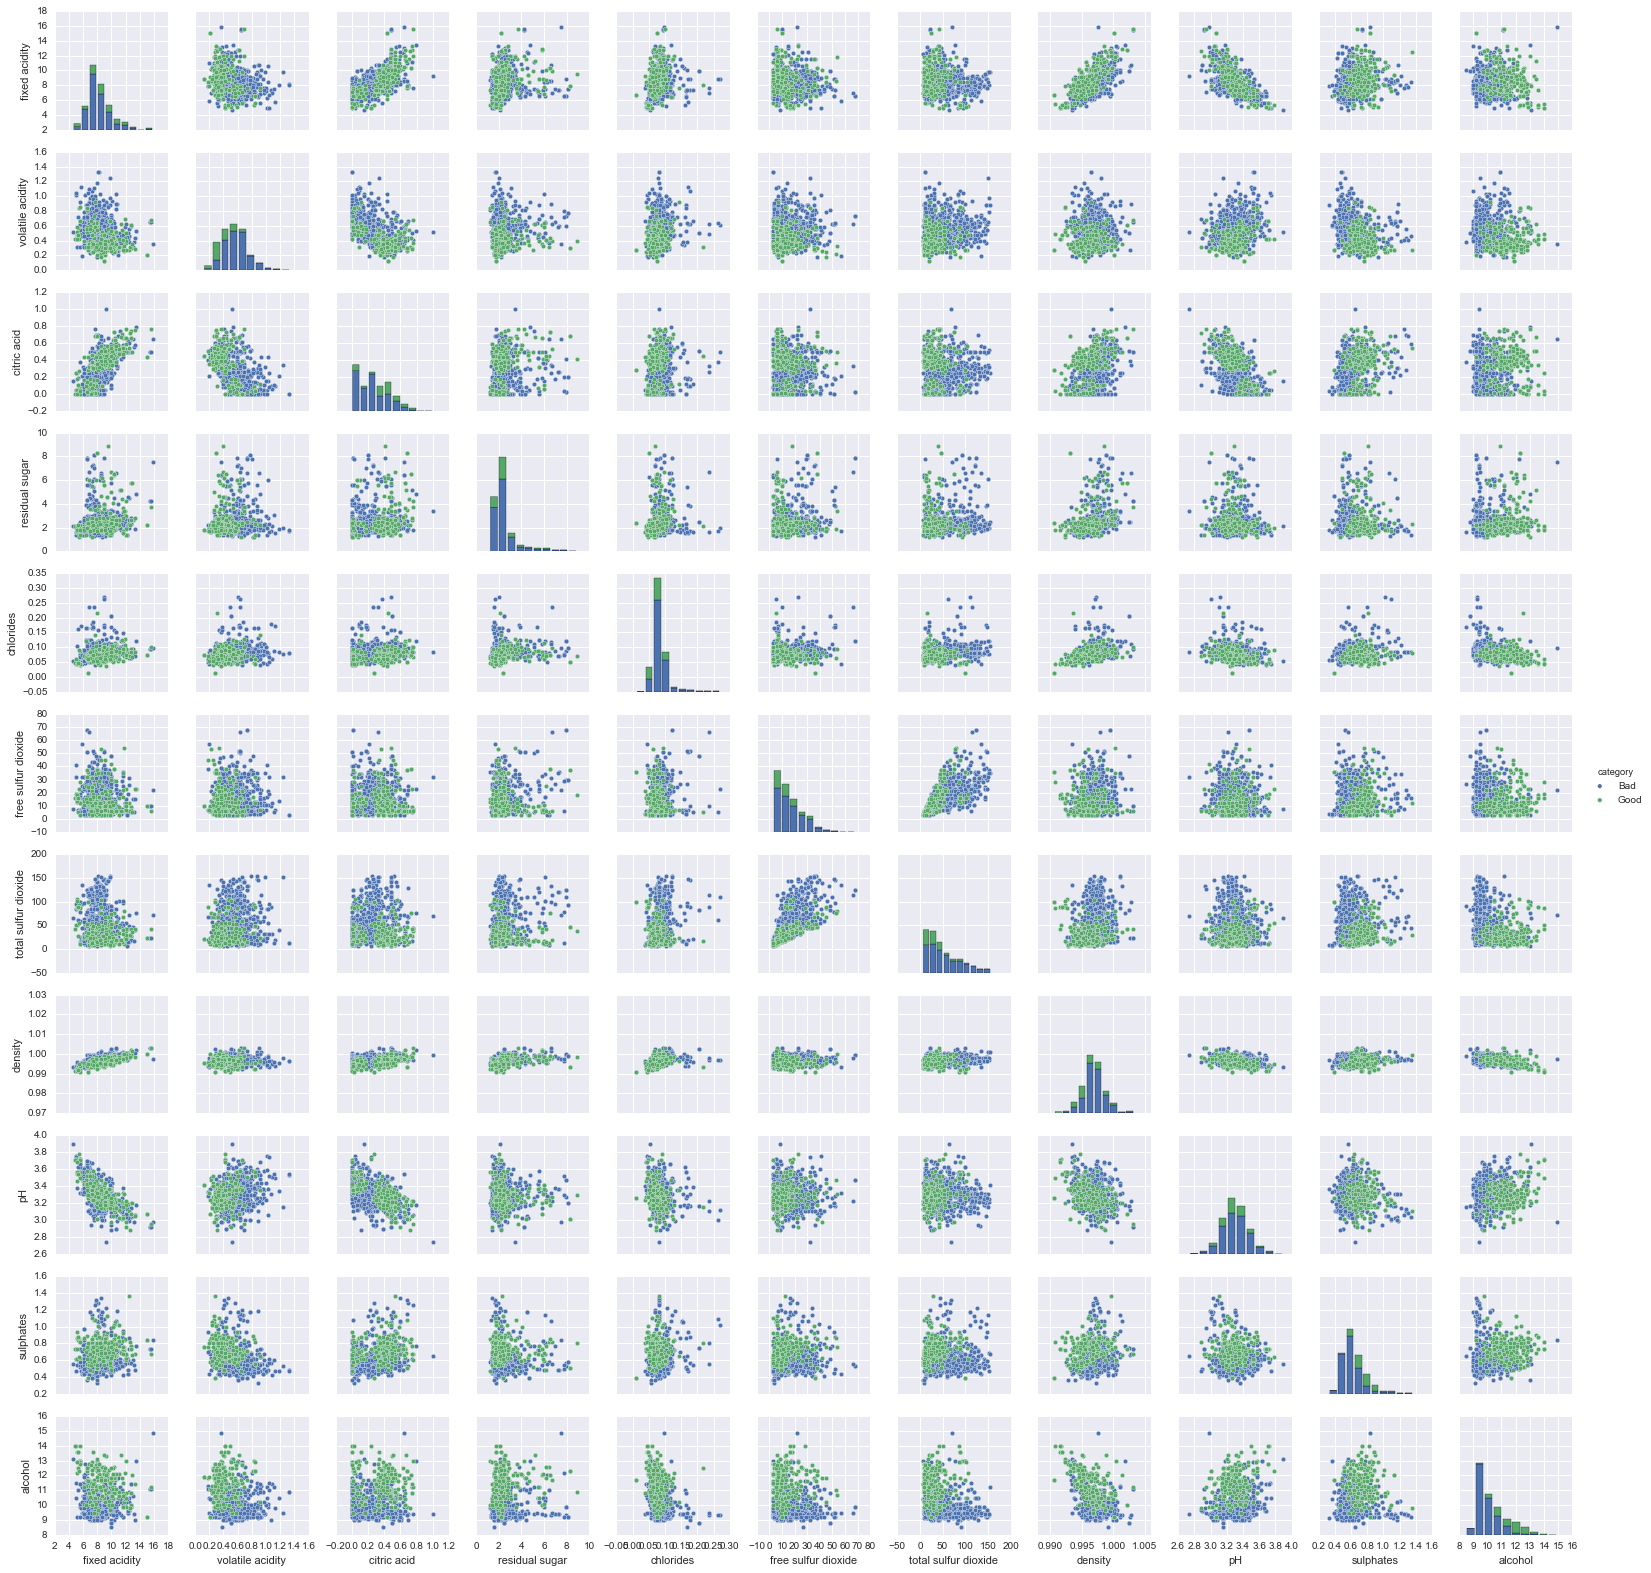

In [31]:
sb.pairplot(red_wine_newcats.drop(['quality'],1), hue='category', size=2)

In [32]:
red_wine_newcats.drop('quality', 1).groupby('category').agg(['mean', 'std']).T

category                         Bad       Good
fixed acidity        mean   8.139237   8.847005
                     std    1.570668   1.999977
volatile acidity     mean   0.585484   0.405530
                     std    0.171900   0.144963
citric acid          mean   0.238665   0.376498
                     std    0.182344   0.194438
residual sugar       mean   2.477937   2.708756
                     std    1.104039   1.363026
chlorides            mean   0.085496   0.074645
                     std    0.024194   0.021008
free sulfur dioxide  mean  16.643052  13.981567
                     std   10.891157  10.234615
total sulfur dioxide mean  55.050409  32.702036
                     std   36.756984  22.017111
density              mean   0.997063   0.996030
                     std    0.001593   0.002201
pH                   mean   3.310477   3.288802
                     std    0.154189   0.154478
sulphates            mean   0.611720   0.743456
                     std    0.149053   0.134038
alcohol              mean   9.926090  11.518049
                     std    0.757750   0.998153

## Heat Map
Another way to visualize the data is using a heat map in Seaborn. Like **`pairplot()`**, all the features in the dataframe a plotted against each other. But, in this case each plot is a color block. The color represents the amount of coorelation between the two variables plotted. The more positive the correlation, the redder the square. The more negative the correlation, the bluer the square. If there is no correlation, the square appears white. As you can imagine, this is a good way to quickly see correlations. But, a lot of the detail seen in the scatter plots is lost.

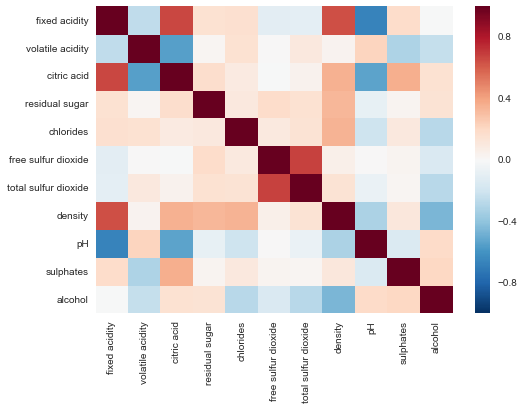

In [33]:
sb.heatmap(red_wine_newcats.drop(['quality'],1).corr())

## Using skflow

Before using TensorFlow, I use skflow to make the model. Skflow is a Python library that wraps many of that TensorFlow commands in routines the are more like scikit-learn.

In [34]:
import sklearn
from sklearn import metrics, preprocessing
from sklearn.cross_validation import train_test_split

import tensorflow.contrib.learn as skflow

It looks like total sulfar dioxide is a good indicator of wine quality. The two categories appear quite distinct in this feature. Let's try using this feature to classify whether the wine is a 'Good' wine or a 'Bad' wine.

### Separate data into labels and features
Here I separate the data into 'labels' (y values) and 'feature' (X values) and divide them into training and test sets using train_test_split() from scikit-learn.

In [35]:
y_red_wine = red_wine_newcats[['category']].get_values()

In [36]:
red_wine_newcats[red_wine_newcats['category'].isin(['Good'])].iloc[0,:-2].get_values().tolist()

[7.2999999999999998,
 0.65000000000000002,
 0.0,
 1.2,
 0.065000000000000002,
 15.0,
 21.0,
 0.99460000000000004,
 3.3900000000000001,
 0.46999999999999997,
 10.0]

In [37]:
X_red_wine = red_wine_newcats['total sulfur dioxide'].get_values()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, random_state=42)

The y values are string categories ('Good' and 'Bad') and so need to be converted to integers so that skflow will understand the categories. This is done using **`transform()`** and **`fit_transform()`** from scikit-learn.

In [39]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [40]:
n_classes = len(cat_processor.vocabularies_[0])

Let's see how many different classes there are:

In [41]:
print("There are {0} different classes.".format(n_classes))

There are 3 different classes.


You will notice that there are 3 classes, but as you will remember, there are only two categories. That's because the **`CategoricalProcessor()`** also includes an uknown token.

In [42]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [43]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=n_classes, learning_rate=0.07)

In [44]:
classifier.fit(X_train, y_train_cat)

/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/io/data_feeder.py:281: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  out.itemset((i, self.y[sample]), 1.0)


Step #100, epoch #4, avg. train loss: 1.16773
Step #200, epoch #8, avg. train loss: 0.49870


TensorFlowEstimator(batch_size=32, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.07,
          model_fn=<function categorical_model at 0x16971e9b0>,
          n_classes=3, optimizer='Adagrad', steps=200, verbose=1)

In [45]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.764397905759


Not bad for a start! Now the model needs to be revised.

### Categorical Model with Two Features

Now I try two features, '`total sulfur dioxide`' and '`citric acid`', to see if this improves the model.

In [46]:
X_red_wine = red_wine_newcats[['total sulfur dioxide','citric acid']].get_values()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, 
                                                    random_state=42)

In [48]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [49]:
n_classes = len(cat_processor.vocabularies_[0])

In [50]:
print("There are {0} different classes.".format(n_classes))

There are 3 different classes.


In [51]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [52]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=n_classes, learning_rate=0.07)

In [53]:
classifier.fit(X_train, y_train_cat)

Step #100, epoch #4, avg. train loss: 0.82749
Step #200, epoch #8, avg. train loss: 0.46800


TensorFlowEstimator(batch_size=32, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.07,
          model_fn=<function categorical_model at 0x169973f50>,
          n_classes=3, optimizer='Adagrad', steps=200, verbose=1)

In [54]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.769633507853


This fit is about the same. Not much improvement.

### Catagorical Model Using Ten Features
I now add additional features. I include all features except fixed acidity, which shows some colinearity with pH and density.

In [55]:
red_wine_newcats.iloc[:,1:-2].head()

volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
4              0.70         0.00             1.9      0.076   
5              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
4      9.4  
5      9.4

In [56]:
X_red_wine = red_wine_newcats.iloc[:,1:-2].get_values()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, 
                                                    random_state=42)

In [58]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [59]:
n_classes = len(cat_processor.vocabularies_[0])

In [60]:
print("There are {0} different classes.".format(n_classes))

There are 3 different classes.


In [61]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [62]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.07)

In [63]:
classifier.fit(X_train, y_train_cat)

Step #100, epoch #4, avg. train loss: 0.78515
Step #200, epoch #8, avg. train loss: 0.42502


TensorFlowEstimator(batch_size=32, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.07,
          model_fn=<function categorical_model at 0x16a253aa0>,
          n_classes=3, optimizer='Adagrad', steps=200, verbose=1)

In [64]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.832460732984


**A dramatically improved accuracy!**

## Tensor Flow

Now I use TensorFlow to model the wine quality data set.

In [324]:
import tensorflow as tf

Convert y-labels from strings to integers. Bad = 0, Good = 1.

In [325]:
y_red_wine_raveled = y_red_wine.ravel()
y_red_wine_integers = [y.replace('Bad', '0') for y in y_red_wine_raveled]
y_red_wine_integers = [y.replace('Good', '1') for y in y_red_wine_integers]
y_red_wine_integers = [np.int(y) for y in y_red_wine_integers]

In [326]:
# print(y_red_wine_integers)

Convert y-labels to one-hot vectors.

In [327]:
def dense_to_one_hot(labels_dense, num_classes=2):
  # Convert class labels from scalars to one-hot vectors
  num_labels = len(labels_dense)
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense] = 1
  return labels_one_hot

In [328]:
y_one_hot = dense_to_one_hot(y_red_wine_integers, num_classes=2)

In [329]:
# print(y_one_hot[0:10])

Divide the data into training and test sets

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_one_hot, test_size=0.2, random_state=42)

Define modeling parameters

In [331]:
learning_rate = 0.001
batch_size = 126

In [332]:
X = tf.placeholder("float", [None,10])
Y = tf.placeholder("float", [None,2])

Set model weights and biases.

In [333]:
W = tf.Variable(tf.zeros([10, 2]))
b = tf.Variable(tf.zeros([2]))

Construct the model. I use softmax regression since this is good for catagorial data.

In [334]:
model = tf.nn.softmax(tf.matmul(X, W) + b)

Minimize the error using cross entropy.

In [335]:
cost = -tf.reduce_mean(Y*tf.log(model))

Define the optimizer. I use gradient descent.

In [336]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Define a TensorFlow session and setup a directory to store the results for the tensorboard graph visualization utility.

In [337]:
sess = tf.Session()

Initialize all variables and start a TensorFlow session.

In [338]:
init = tf.initialize_all_variables()
sess.run(init)

In [339]:
for i in range(100):
    average_cost = 0
    number_of_batches = int(len(X_train) / batch_size)
    for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
        sess.run(optimizer, feed_dict={X: X_train[start:end], Y: y_train[start:end]})
        # Compute average loss
        average_cost += sess.run(cost, feed_dict={X: X_train[start:end], Y: y_train[start:end]}) / number_of_batches
    print("Epoch:", '%04d' % (i+1), "cost=", "{:.9f}".format(average_cost))
    
print('Finished optimization!')

Epoch: 0001 cost= 0.249063037
Epoch: 0002 cost= 0.245696974
Epoch: 0003 cost= 0.244979247
Epoch: 0004 cost= 0.244354119
Epoch: 0005 cost= 0.243782466
Epoch: 0006 cost= 0.243257249
Epoch: 0007 cost= 0.242773935
Epoch: 0008 cost= 0.242328577
Epoch: 0009 cost= 0.241917660
Epoch: 0010 cost= 0.241538028
Epoch: 0011 cost= 0.241186880
Epoch: 0012 cost= 0.240861637
Epoch: 0013 cost= 0.240560027
Epoch: 0014 cost= 0.240280017
Epoch: 0015 cost= 0.240019699
Epoch: 0016 cost= 0.239777451
Epoch: 0017 cost= 0.239551696
Epoch: 0018 cost= 0.239341083
Epoch: 0019 cost= 0.239144355
Epoch: 0020 cost= 0.238960398
Epoch: 0021 cost= 0.238788178
Epoch: 0022 cost= 0.238626746
Epoch: 0023 cost= 0.238475236
Epoch: 0024 cost= 0.238332875
Epoch: 0025 cost= 0.238198983
Epoch: 0026 cost= 0.238072860
Epoch: 0027 cost= 0.237953939
Epoch: 0028 cost= 0.237841668
Epoch: 0029 cost= 0.237735542
Epoch: 0030 cost= 0.237635108
Epoch: 0031 cost= 0.237539950
Epoch: 0032 cost= 0.237449663
Epoch: 0033 cost= 0.237363897
Epoch: 003

Test the model:

In [340]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y_test, 1))

Calculate the accuracy:

In [341]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy: {0}".format(sess.run(accuracy, feed_dict={X: X_test, Y: y_test})))

Accuracy: 0.76963353157


In [342]:
bad_values = red_wine_newcats[red_wine_newcats['category'].isin(['Bad'])].iloc[:,1:-2].get_values().tolist()
good_values = red_wine_newcats[red_wine_newcats['category'].isin(['Good'])].iloc[:,1:-2].get_values().tolist()

test_values = good_values  # [bad_values, good_values]
# test_values = bad_values  # [bad_values, good_values]

# Define function
def simple(x1):
    return sess.run(model, feed_dict={X: x1})

# print(simple(test_values))

# simple_result = simple(test_values)
# simple_result = simple(good_values)
# first_values_good = [x[0] for x in simple_result]
# first_values_mean_good = np.array(first_values_good).mean()

# print ('Mean of first values for good: {}'.format(first_values_mean_good))

simple_result = simple(good_values)
second_values_good = [x[1] for x in simple_result]
second_values_mean_good = np.array(second_values_good).mean()

print ('Mean of second values for good: {}'.format(second_values_mean_good))

simple_result = simple(bad_values)
first_values_bad = [x[0] for x in simple_result]
first_values_mean_bad = np.array(first_values_bad).mean()

print ('Mean of first values for bad: {}'.format(first_values_mean_bad))

# print('Mean of both: {}'.format(np.array([first_values_mean_good, first_values_mean_bad])).mean())

Mean of second values for good: 0.356052041054
Mean of first values for bad: 0.773000299931


In [343]:
print(np.array([0.643947899342, 0.773000299931]).mean())

0.708474099636


In [344]:
np.sort(red_wine_newcats['category'].unique().ravel()).tolist()

[u'Bad', u'Good']

In [345]:
def replace_labels(label_series):
    label_series_raveled = label_series.ravel().copy()
    labels_to_replace = np.sort(label_series.unique())
    replace_with = np.arange(len(labels_to_replace)).tolist()
    # print(replace_with)
    new_series = pd.Series(label_series_raveled).replace(to_replace=labels_to_replace, value=replace_with)
    
    return np.array(new_series).tolist()

# print(replace_labels(red_wine_newcats['category']))

In [346]:
y_ints = replace_labels(red_wine_newcats['category'])

In [347]:
# print(dense_to_one_hot(y_ints, num_classes=2))

In [348]:
sess.close()  # Close the tensor flow session

## TensorFlow with Tensorboard
Now, I rerun TensorFlow, but use Tensorboard. This will output a graphical representation of how the model is created and fit.

Define modeling parameters

In [349]:
learning_rate = 0.001
batch_size = 126

In [350]:
X = tf.placeholder("float", [None, 10], name='X-input')
y = tf.placeholder("float", [None, 2], name='y-input')

Set model weights and biases.

In [351]:
W = tf.Variable(tf.zeros([10, 2]), name='Weights')
b = tf.Variable(tf.zeros([2]), name='Biases')

Use a name scope to organize nodes in the graph visualizer. Scope is a TensorFlow library that allows the user to share variables.

In [352]:
with tf.name_scope("Wx_b") as scope:
  model = tf.nn.softmax(tf.matmul(X, W) + b)

Add summary opperations to collect the data.

In [353]:
w_hist = tf.histogram_summary("Weights", W)
b_hist = tf.histogram_summary("Biases", b)
y_hist = tf.histogram_summary("model", model)

Define the loss and optimizer functions.

In [354]:
with tf.name_scope("cross_entropy") as scope:
  cross_entropy = -tf.reduce_mean(Y*tf.log(model))
  ce_summ = tf.scalar_summary("cross entropy", cross_entropy)    
with tf.name_scope("train") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [355]:
with tf.name_scope("test") as scope:
  correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy_summary = tf.scalar_summary("accuracy", accuracy)

Define a TensorFlow session and setup a directory to store the results for the tensorboard graph visualization utility.

In [356]:
# sess = tf.Session()
# merged = tf.merge_all_summaries()
# writer = tf.train.SummaryWriter("tmp/wine_quality_logs", sess.graph)

Initialize all variables and start a TensorFlow session.

In [357]:
# init = tf.initialize_all_variables()
# sess.run(init)

In [358]:
batch_size = 120
with tf.Session() as sess:
    
    merged = tf.merge_all_summaries()
    writer = tf.train.SummaryWriter("tmp/wine_quality_logs", sess.graph)
    
    tf.initialize_all_variables().run()
    
    for i in range(100):
        number_of_batches = int(len(X_train) / batch_size)
        if i % 10 == 0:
            feed = {X: X_test, y: y_test}
            result = sess.run([merged, accuracy], feed_dict=feed)
            summary_str = result[0]
            acc = result[1]
            writer.add_summary(summary_str, i)
            print("Accuracy at step %s: %s" % (i, acc))
        else:
            for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
                feed = {X: X_train[start:end], y: y_train[start:end]}
                sess.run(optimizer, feed_dict=feed)
                
    print("Accuracy: {0}".format(sess.run(accuracy, feed_dict={X: X_test, y: y_test})))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'Placeholder_1', defined at:
  File "/Users/dave/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/dave/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/dave/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/dave/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/dave/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/dave/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-c3e2b9c1ec69>", line 2, in <module>
    Y = tf.placeholder("float", [None,2])
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 762, in placeholder
    name=name)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 976, in _placeholder
    name=name)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2154, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/dave/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1154, in __init__
    self._traceback = _extract_stack()


In [ ]:
# print("Accuracy: {0}".format(sess.run(accuracy, feed_dict={X: X_test, Y: y_test})))

In [ ]:
# sess.close()  # Close the tensor flow session

Tensorboard can be launched from the command line by navigating to the directory with this notebook and running the following command:

In [ ]:
# !python ~/anaconda/bin/tensorboard --logdir=tmp/wine_quality_logs

**Note:** TensorFlow with tensorboard may throw the error `InvalidArgumentError: You must feed a value for placeholder tensor 'X-input' with dtype float`. This has to do with a conflict with the Jupyter Notebook and TensorFlow creating a graph definition twice. The best remedy at this time is to restart the kernal and rerun the code.



*Reference: Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.*